In [1]:
import pandas as pd
#import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
#from common.utils import load_data, mape

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [50]:
dataset = pd.read_csv('Colab Notebooks/Linear Regression/time_series_covid19_confirmed_US.csv')


In [51]:
dataf= pd.DataFrame(dataset)
col = list(dataset.columns.values)
col_value = (list(dataf.sum(axis = 0, skipna = True)))
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])
data = df1.drop(df1.index)
print(df1)

       Title                                             Values
0        UID                                       278822801147
1       iso2  USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
2       iso3  USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...
3      code3                                            2788882
4       FIPS                                        110099539.0
..       ...                                                ...
726   1/6/22                                           59388686
727   1/7/22                                           59767418
728   1/8/22                                           60090560
729   1/9/22                                           61556085
730  1/10/22                                           62308472

[731 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [52]:
col1 = list(df1.columns.values)
print(col1)
df1 = df1.drop(0) 
df1 = df1.drop(1) 
df1 = df1.drop(2) 
df1 = df1.drop(3) 
df1 = df1.drop(4) 
df1 = df1.drop(5) 
df1 = df1.drop(6) 
df1 = df1.drop(7) 
df1 = df1.drop(8) 
df1 = df1.drop(9) 
df1 = df1.drop(10) 
df1 = df1.drop(11) 
df1 = df1.drop(723) 
df1

['Title', 'Values']


,Title,Values
12,1/23/20,2
13,1/24/20,2
14,1/25/20,5
15,1/26/20,5
16,1/27/20,5
...,...,...
726,1/6/22,59388686
727,1/7/22,59767418
728,1/8/22,60090560
729,1/9/22,61556085


In [53]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

dates = df1['Title']
date_format = [pd.to_datetime(d) for d in dates]
date_time = [date_format[d].strftime("%d-%m-%Y") for d in range(711)]
#str_date_time = date_format[0].strftime("%d-%m-%Y %H:%M:%S")
#df1.set_index('Title',inplace=True)

In [54]:
#print(date_format)
#df1.set_index(date_time,inplace=True)
df1['Time'] = date_time
print(df1)

ValueError: ignored

In [ ]:
df1.set_index('Time',inplace=True)

In [55]:
df1

,Title,Values
12,1/23/20,2
13,1/24/20,2
14,1/25/20,5
15,1/26/20,5
16,1/27/20,5
...,...,...
726,1/6/22,59388686
727,1/7/22,59767418
728,1/8/22,60090560
729,1/9/22,61556085


In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 12 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   718 non-null    object
 1   Values  718 non-null    object
dtypes: object(2)
memory usage: 16.8+ KB


In [57]:
df1.index.freq='A'

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 12 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   718 non-null    object
 1   Values  718 non-null    object
dtypes: object(2)
memory usage: 16.8+ KB


In [59]:
df1["Values"] = df1["Values"].astype('int')

In [60]:
del df1['Title']

In [61]:
  df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 12 to 730
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Values  718 non-null    int64
dtypes: int64(1)
memory usage: 11.2 KB


In [62]:
df1.index.freq='A'

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 12 to 730
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Values  718 non-null    int64
dtypes: int64(1)
memory usage: 11.2 KB


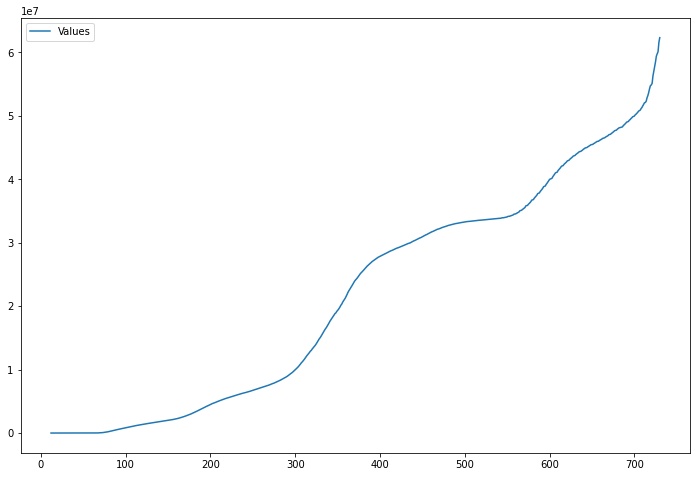

In [64]:
df1.plot(figsize=(12,8))

In [65]:
train = df1.iloc[:600]

In [66]:
test = df1.iloc[601:]

In [67]:
len(test)

117

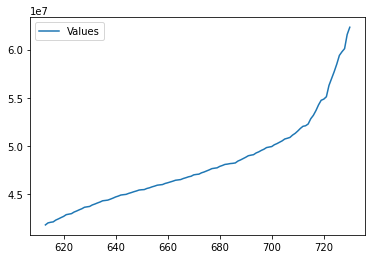

In [68]:
test.plot()

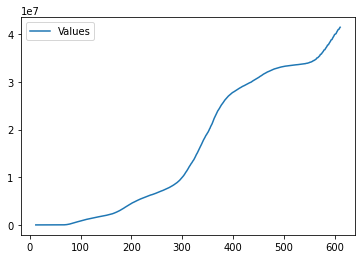

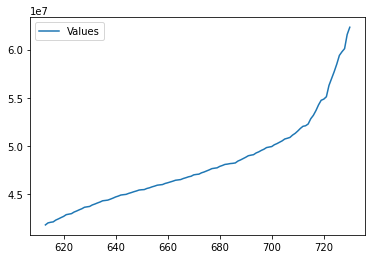

In [69]:
train.plot()
test.plot()

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [71]:
data = np.array(df1["Values"])

In [72]:
#np.asarray(data)

In [73]:
#data = train["Values"].astype('int')

In [74]:
#df1.index = pd.DatetimeIndex(df1.index).to_period('M')

In [75]:
#test.index = pd.DatetimeIndex(test.index).to_period('M')

In [76]:
#train.index = pd.DatetimeIndex(train.index).to_period('M')

In [77]:
model = ExponentialSmoothing(train['Values'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



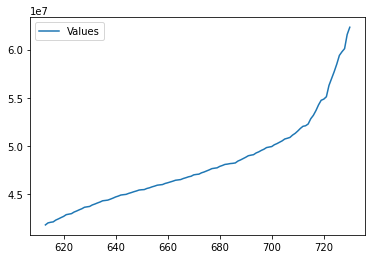

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



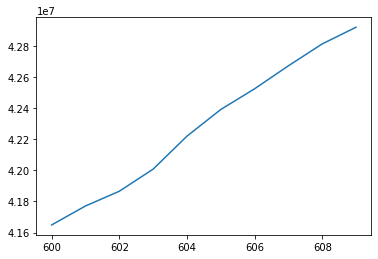

In [78]:
test.plot()
plt.show()
model.forecast(10).plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



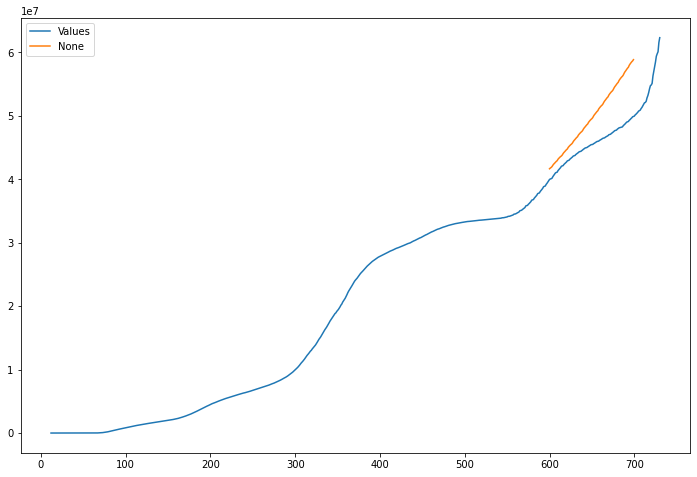

In [79]:
df1.plot(figsize=(12,8))
test_data = model.forecast(100).plot()
plt.legend()

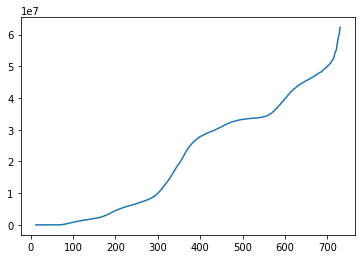

In [80]:
#today = datetime.date.today()
plt.figure()
plt.plot(df1.index,df1['Values'])

In [81]:
SimpleExpSmoothing(df1).fit(smoothing_level=0.1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [82]:
import plotly.express as px
fig = px.line(df1)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



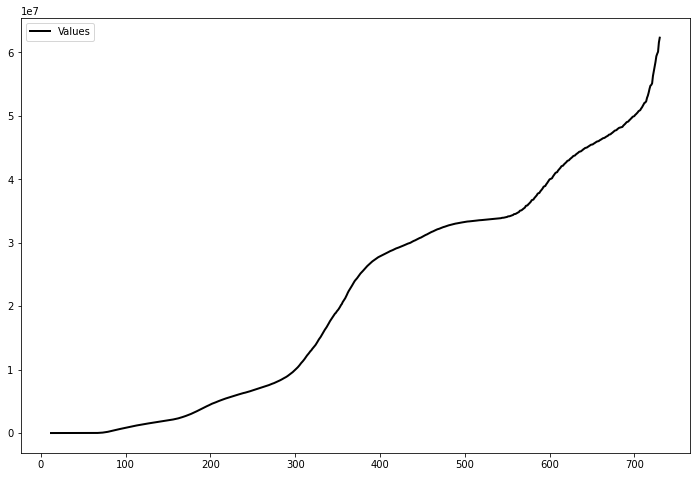

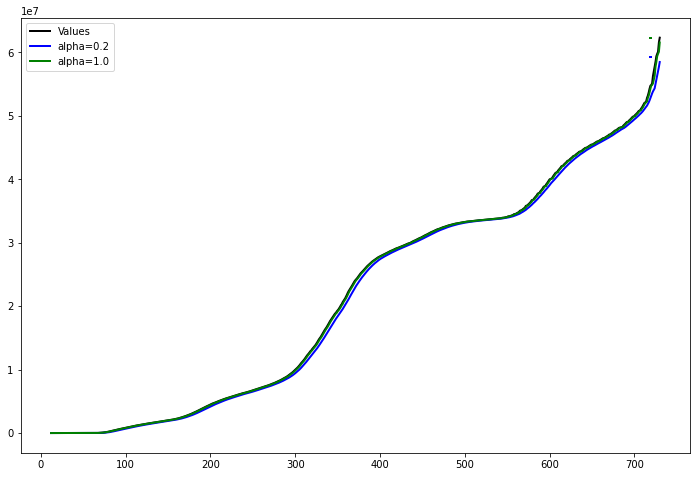

In [83]:
ax = df1.plot( color='black', figsize=(12,8), legend=True,linewidth=2)

#First Instance
ins1 = SimpleExpSmoothing(df1).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

#Second Instance
#ins2 = SimpleExpSmoothing(df1).fit(smoothing_level=0.8,optimized=False)
#ins_cast2 = ins2.forecast(3).rename('alpha=0.5')

#Third Instance
ins3 = SimpleExpSmoothing(df1).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = df1.plot(color='black', figsize=(12,8), legend=True,linewidth=2)

#Plot for alpha =0.2
ins_cast1.plot( ax=ax, color='blue', legend=True,linewidth =2)
ins1.fittedvalues.plot( ax=ax, color='blue',linewidth = 2)

#Plot for alpha = 0.5
#ins_cast2.plot(ax=ax, color='red', legend=True,linewidth = 2)
#ins2.fittedvalues.plot(ax=ax, color='red',linewidth = 2)

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(ax=ax, color='green', legend=True,linewidth = 2)
ins3.fittedvalues.plot(ax=ax, color='green',linewidth = 2)

plt.show()